In [1]:
# 필요한 패키지 설치
!pip install imbalanced-learn==0.7.0
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import *
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.dpi'] = 300

In [2]:
# 데이터 불러오기
# https://www.kaggle.com/datasets/dragonheir/logistic-regression
df = pd.read_csv("datasets/Social_Network_Ads.csv")

# 데이터 샘플 확인
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
# 각 컬럼의 속성 및 결측치 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


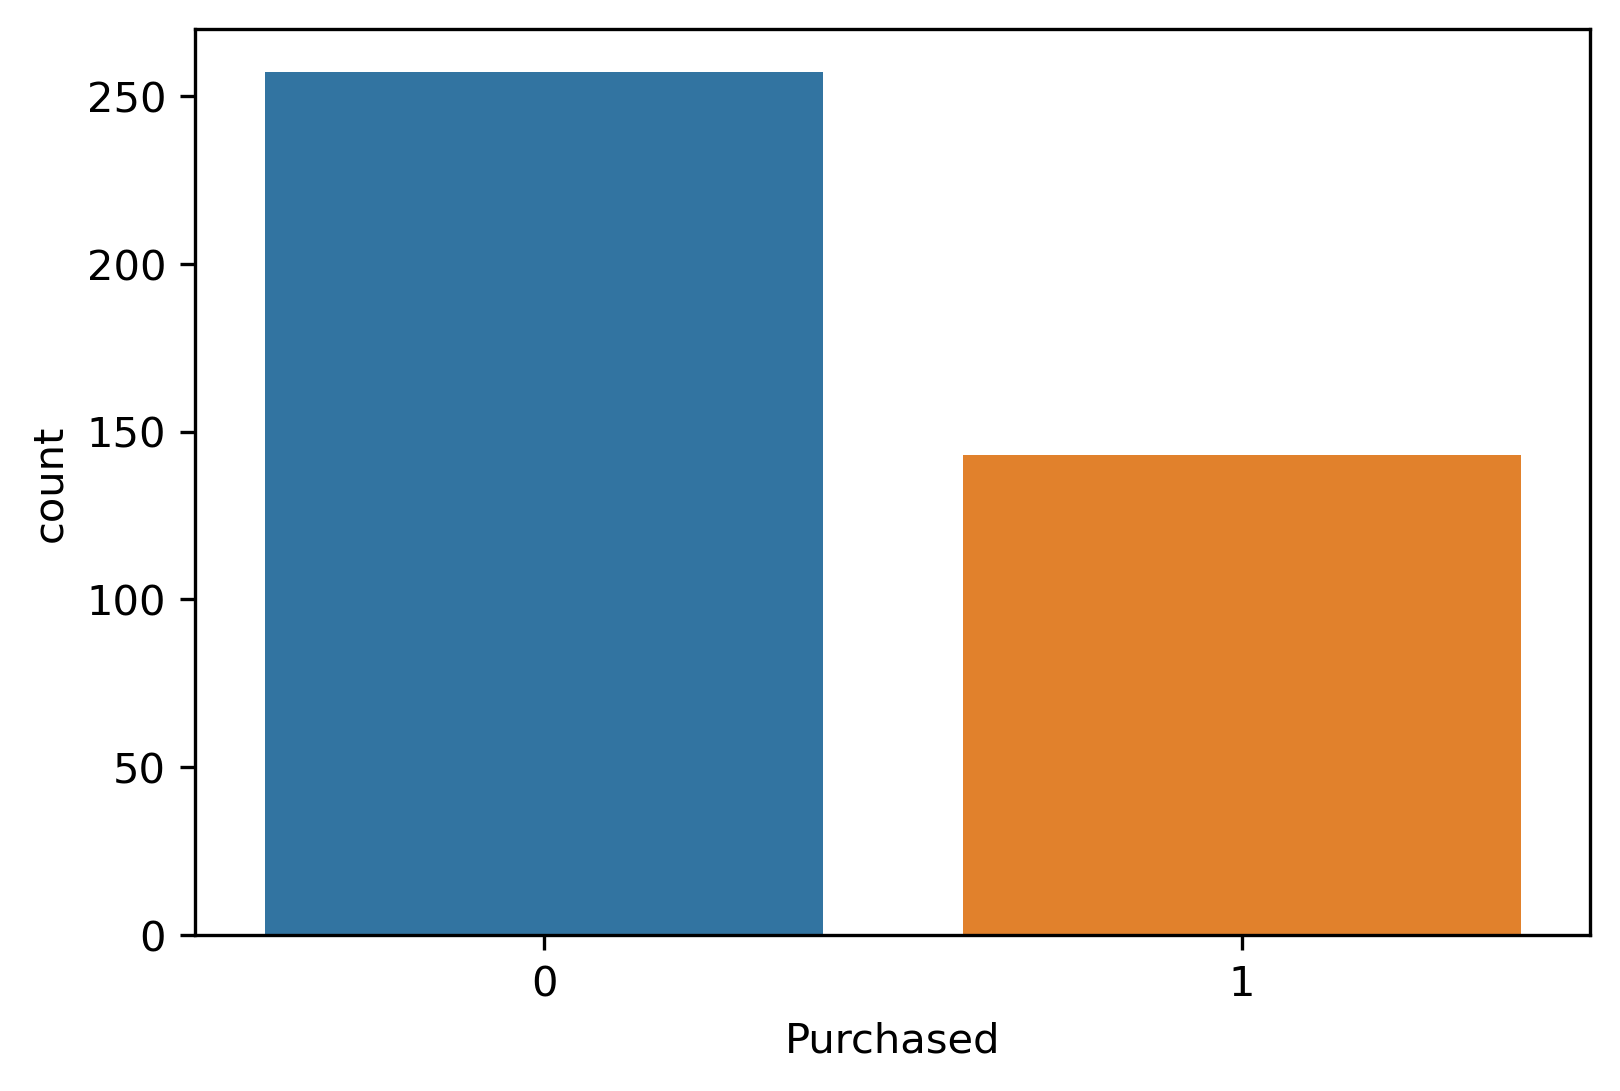

In [4]:
# Purchased 컬럼 클래스 분포 시각화
sns.countplot(x="Purchased", data=df)

plt.show()

In [5]:
# Gender 컬럼 가변수 처리

df_d = pd.get_dummies(df['Gender'])

df2 = pd.merge(df.drop(['Gender'], axis=1), 
               df_d['Male'],left_index=True, right_index=True,how = 'inner')

df2.head()

,User ID,Age,EstimatedSalary,Purchased,Male
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1


In [6]:
# 데이터셋 학습셋, 테스트셋 분리

X = df2.drop(['Purchased'], axis=1)
y = df2[['Purchased']]

X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.25,random_state=10)

X_train.head()

,User ID,Age,EstimatedSalary,Male
57,15807481,28,79000,1
87,15631912,28,85000,0
357,15671387,41,72000,0
355,15606472,60,34000,1
238,15617877,46,82000,0


In [7]:
# 언더샘플링 적용

X_train_under, y_train_under = RandomUnderSampler(
    random_state=0).fit_resample(X_train,y_train)

print('RandomUnderSampler 적용 전 학습셋 변수/레이블 데이터 세트: '
      , X_train.shape, y_train.shape)
print('RandomUnderSampler 적용 후 학습셋 변수/레이블 데이터 세트: '
      , X_train_under.shape, y_train_under.shape)
print('RandomUnderSampler 적용 전 레이블 값 분포: \n'
      , pd.Series(y_train['Purchased']).value_counts())
print('RandomUnderSampler 적용 후 레이블 값 분포: \n'
      , pd.Series(y_train_under['Purchased']).value_counts())

RandomUnderSampler 적용 전 학습셋 변수/레이블 데이터 세트:  (300, 4) (300, 1)
RandomUnderSampler 적용 후 학습셋 변수/레이블 데이터 세트:  (224, 4) (224, 1)
RandomUnderSampler 적용 전 레이블 값 분포: 
 0    188
1    112
Name: Purchased, dtype: int64
RandomUnderSampler 적용 후 레이블 값 분포: 
 1    112
0    112
Name: Purchased, dtype: int64


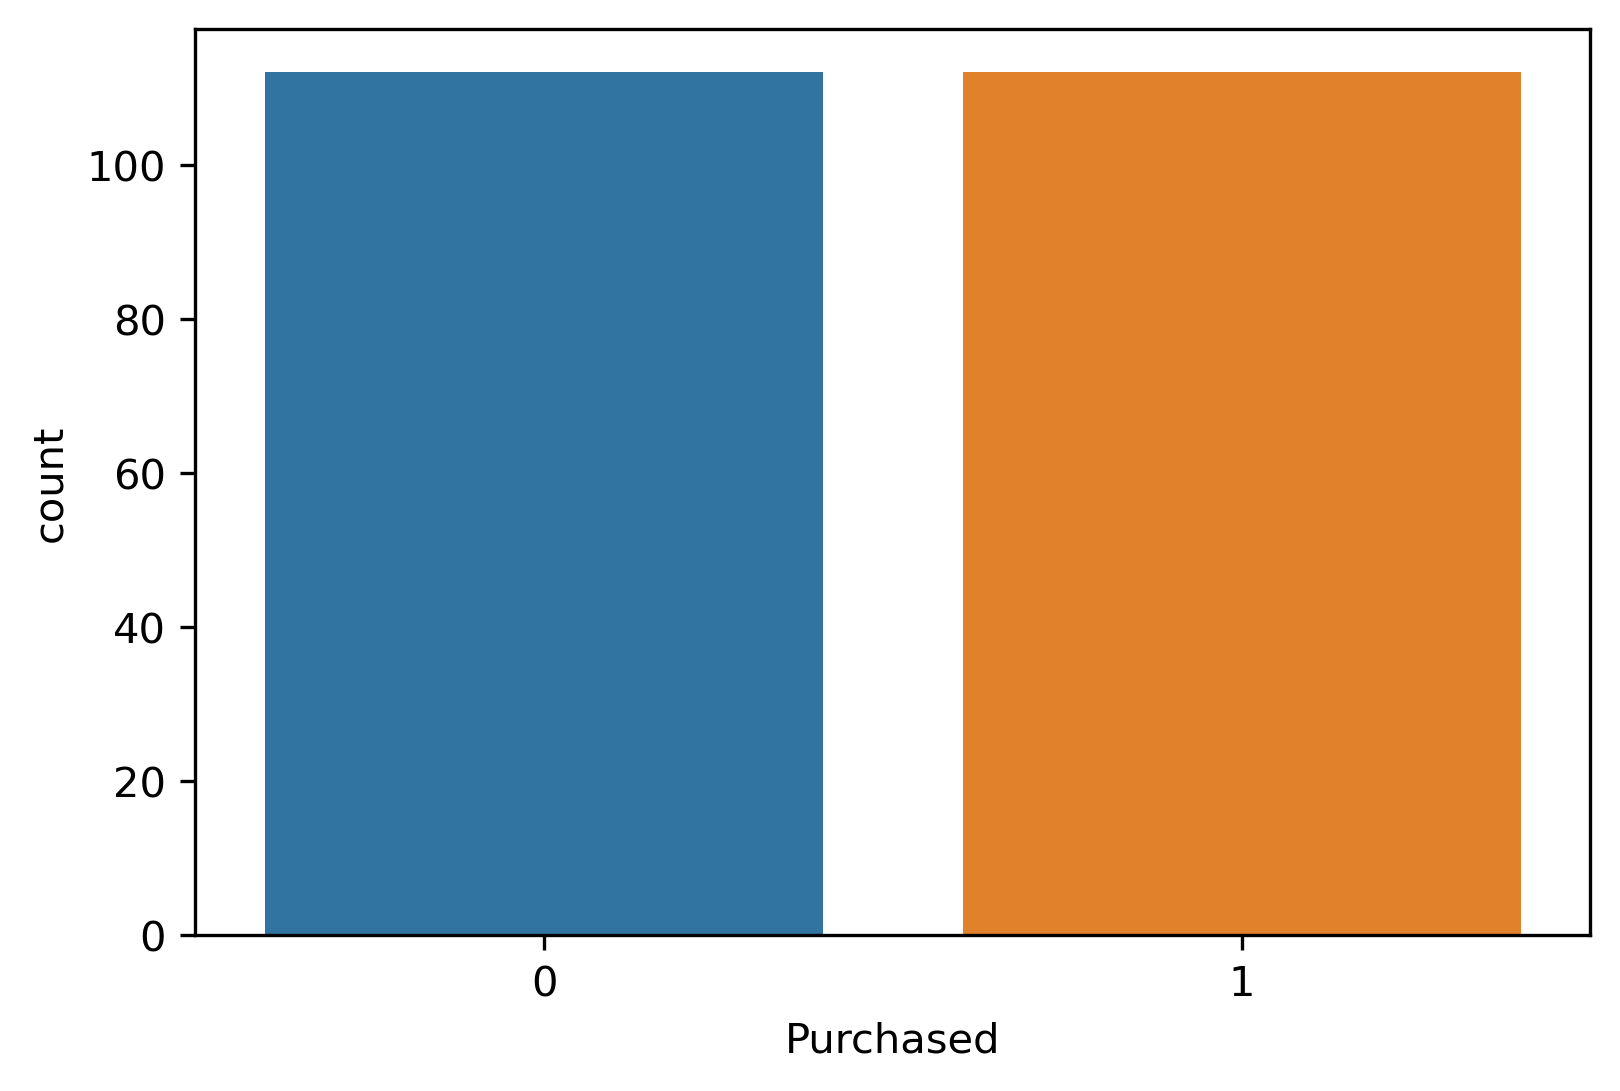

In [8]:
# 언더샘플링 적용 후 Purchased 컬럼 클래스 분포 시각화
sns.countplot(x="Purchased", data=y_train_under)

plt.show()

In [9]:
# 오버샘플링 적용

smote = SMOTE(k_neighbors = 2, random_state=0)
oversample = SMOTE()

X_train_over,y_train_over = smote.fit_resample(X_train,y_train)
print('SMOTE 적용 전 학습용 변수/레이블 데이터 세트: '
      , X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 변수/레이블 데이터 세트: '
      , X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 전 레이블 값 분포: \n'
      , pd.Series(y_train['Purchased']).value_counts())
print('SMOTE 적용 후 레이블 값 분포: \n'
      , pd.Series(y_train_over['Purchased']).value_counts())

SMOTE 적용 전 학습용 변수/레이블 데이터 세트:  (300, 4) (300, 1)
SMOTE 적용 후 학습용 변수/레이블 데이터 세트:  (376, 4) (376, 1)
SMOTE 적용 전 레이블 값 분포: 
 0    188
1    112
Name: Purchased, dtype: int64
SMOTE 적용 후 레이블 값 분포: 
 1    188
0    188
Name: Purchased, dtype: int64


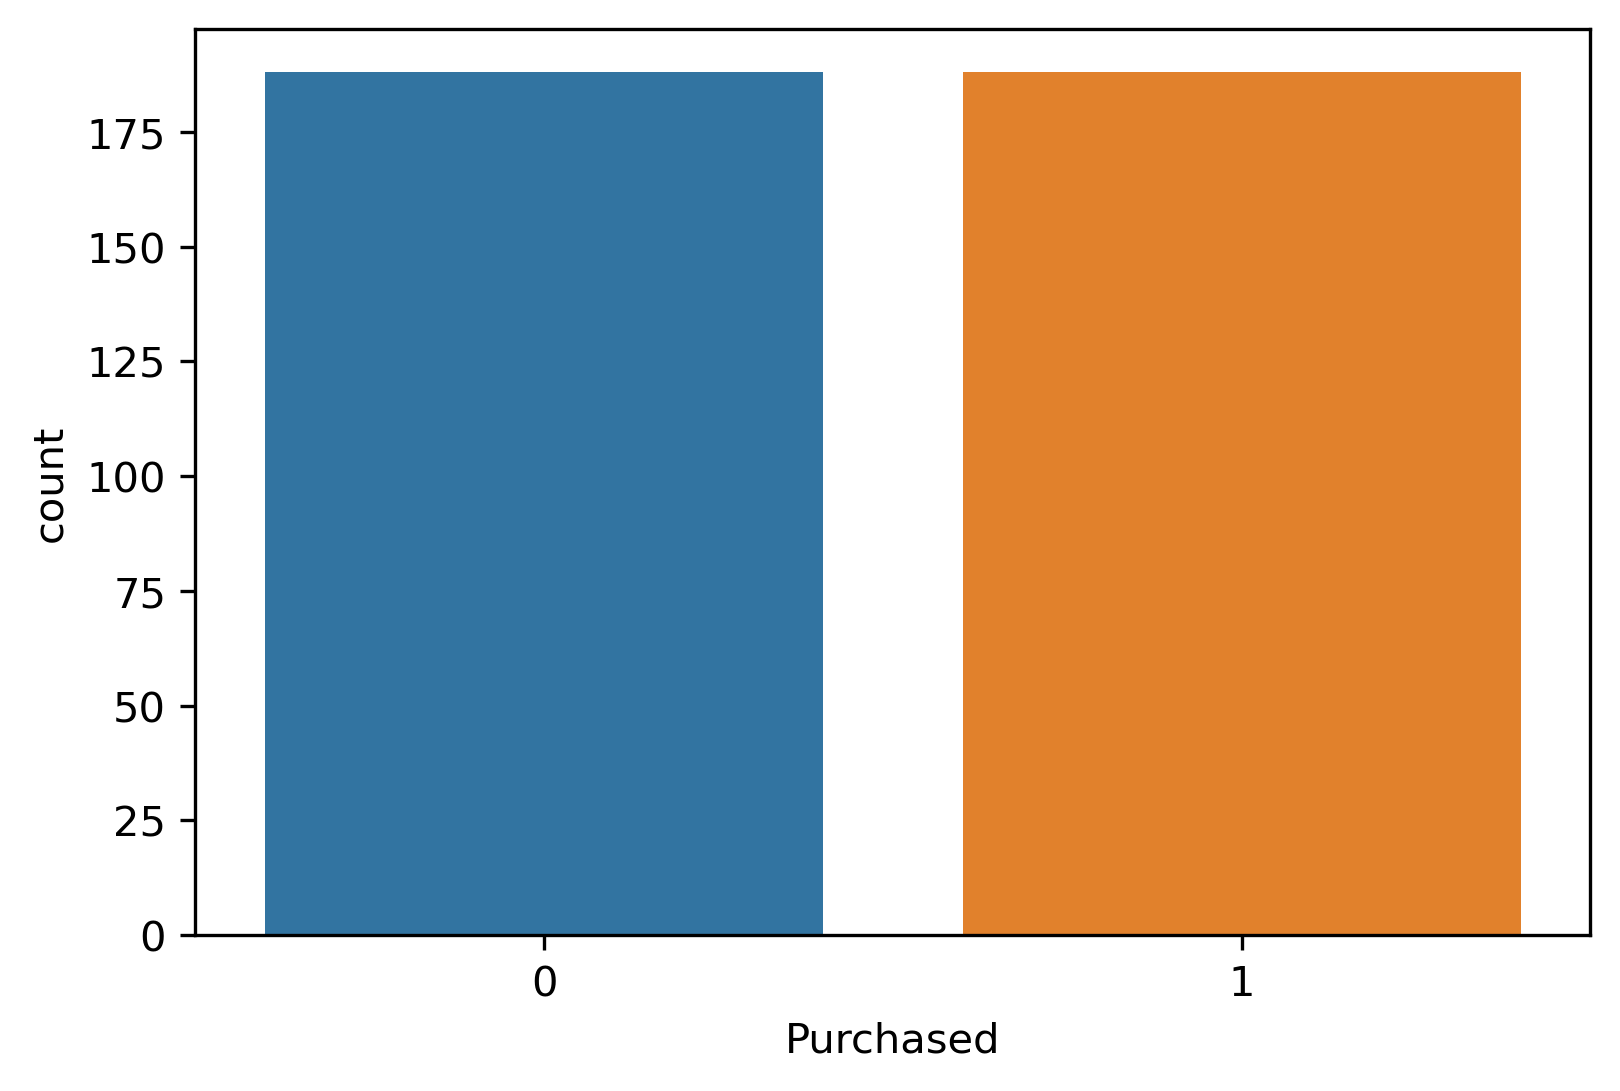

In [10]:
# 오버샘플링 적용 후 Purchased 컬럼 클래스 분포 시각화
sns.countplot(x="Purchased", data=y_train_over)

plt.show()

In [11]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 57 to 265
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Purchased  300 non-null    int64
dtypes: int64(1)
memory usage: 4.7 KB


In [14]:
X_train_under.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   User ID          224 non-null    int64
 1   Age              224 non-null    int64
 2   EstimatedSalary  224 non-null    int64
 3   Male             224 non-null    uint8
dtypes: int64(3), uint8(1)
memory usage: 5.6 KB
